# Modelling : ADA BOOST (BOOSTING TECHNIQUES)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [4]:
#Importing data
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
#split the data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 12 , train_size = 0.8)

**BASELINE MODEL**

In [27]:
#modelling
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train , y_train)

AdaBoostClassifier()

In [33]:
#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Train accuracy
Xtrain_pred = ada_model.predict(X_train)
print("Train Accuracy : " , accuracy_score(y_train , Xtrain_pred))

#Test Accuracy
Xtest_pred = ada_model.predict(X_test)
print("Test Accuracy : " , accuracy_score(y_test , Xtest_pred))

#Cross Validation Score
print("CV Score : " , cross_val_score(ada_model , X_train , y_train , cv = 5 , scoring = 'accuracy').mean())

Train Accuracy :  0.9456066945606695
Test Accuracy :  0.85
CV Score :  0.7696808510638299


**Fine-Tuning the model**

In [38]:
from sklearn.model_selection import GridSearchCV

estimator = AdaBoostClassifier()
params_grid = {'n_estimators' : list(range(1,100)),
               'learning_rate' : [0,0.1, 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]}

fine_model = GridSearchCV(estimator , params_grid , cv = 5 , scoring = 'accuracy')
fine_model.fit(X_train , y_train)
fine_model.best_params_

{'learning_rate': 0.2, 'n_estimators': 17}

In [46]:
features = fine_model.best_estimator_.feature_importances_

In [52]:
X_train_updated = X_train.iloc[:,features > 0]
X_test_updated = X_test.iloc[:,features > 0]

In [60]:
updated_ada_model = AdaBoostClassifier(learning_rate = 0.2, n_estimators = 17)
updated_ada_model.fit(X_train_updated , y_train)

#Train accuracy
Xtrain_pred = updated_ada_model.predict(X_train_updated)
print("Train Accuracy : " , accuracy_score(y_train , Xtrain_pred))

#Test Accuracy
Xtest_pred = updated_ada_model.predict(X_test_updated)
print("Test Accuracy : " , accuracy_score(y_test , Xtest_pred))

#Cross Validation Score
print("CV Score : " , cross_val_score(updated_ada_model , X_train_updated , y_train , cv = 5 , scoring = 'accuracy').mean())

Train Accuracy :  0.8577405857740585
Test Accuracy :  0.9
CV Score :  0.8452127659574469


**ROC CURVE**

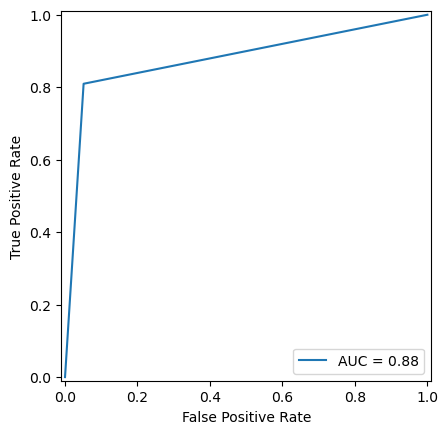

In [63]:
from sklearn.metrics import roc_curve , auc , RocCurveDisplay

fpr , tpr , threshold = roc_curve(y_test , Xtest_pred)
roc_auc = auc(fpr , tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr , roc_auc = roc_auc).plot()
plt.show()

**Confusion Matric**

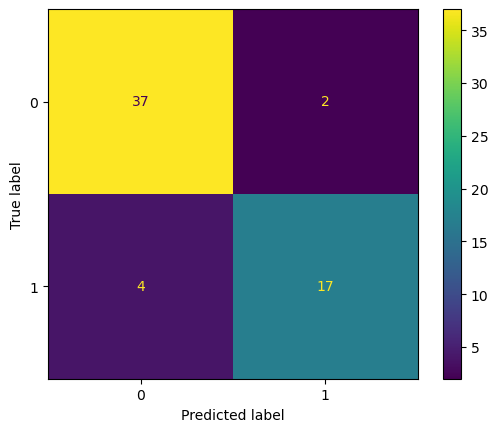

In [68]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

cm = confusion_matrix(y_test , Xtest_pred)
ConfusionMatrixDisplay(cm,display_labels = [0,1]).plot()
plt.show()